[View in Colaboratory](https://colab.research.google.com/github/LjBLincoln/Machine_Learning/blob/master/wxplusb.ipynb)

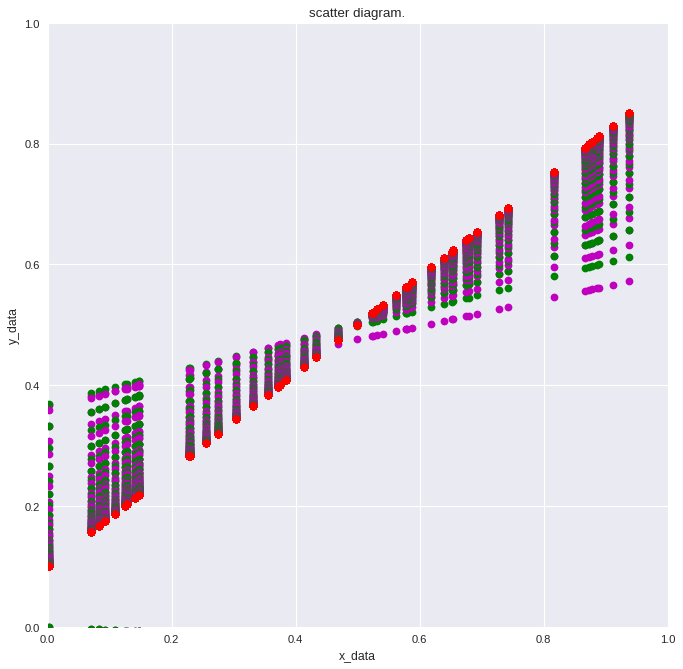

Done !!!


In [86]:
# _*_ coding: utf-8 _*_

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

MAX_STEPS = 500




#input module
with tf.name_scope('input'):
    # create data 生成100个0-1之间的随机数   np.random.rand(100) 1*100的矩阵
    #np.random.rand(3,3) 3*3的矩阵，其每个元素为0-1的随机数
    x_data = np.random.rand(50).astype(np.float32)
    y_data = x_data * 0.8 + 0.1


# layer
with tf.name_scope('slayer'):
    with tf.name_scope('x'):
        x = tf.placeholder(tf.float32, shape = (50), name = "x")
    with tf.name_scope('weights'):
        ### create tensorflow structure start ###对权进行赋值 在-1到一之间随机数
        #uniform([1]为1*1的矩阵，即一个数
        Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
        tf.summary.histogram('Weights' ,Weights)
    with tf.name_scope('biases'):
        #偏差为零，zeros([1]为一个1*1的零矩阵，即初始偏差为零
        biases = tf.Variable(tf.zeros([1]))
        tf.summary.histogram('biases' ,biases)
    with tf.name_scope('Wx_plus_b'):
        #权值与x相乘并加偏差
        y = Weights * x + biases 

#Mean Squared Error)
with tf.name_scope('Mean_Squared_Error'):
    #方差，(y-y_data)平方，求和，取均值
    loss = tf.reduce_mean(tf.square(y-y_data))
    tf.summary.scalar('loss', loss)

#Optimizer
with tf.name_scope('train'):
    #定义梯度下降法优化函数，优化，步长为0.5
    optimizer = tf.train.GradientDescentOptimizer(0.1)
    #tf.summary.scalar('optimizer', optimizer)
    train = optimizer.minimize(loss)
    

merged = tf.summary.merge_all()

init = tf.global_variables_initializer()
#session
sess = tf.Session()

#create FileWriter and loadd graph
train_writer = tf.summary.FileWriter('/tmp/tf-wx+b'+'/train', sess.graph)

sess.run(init)

plt.figure(figsize=(10, 10), dpi=80)
plt.ion()

for step in range(MAX_STEPS):
    
    plt.title("scatter diagram.")
    plt.xlabel("x_data")
    plt.ylabel("y_data")
    plt.xlim(xmax=1, xmin=0)
    plt.ylim(ymax=1,ymin=0)
    plt.plot(x_data,y_data,'ro',color='r',linewidth=0.5)

    y_re,t,w,b = sess.run([y,train,Weights,biases],feed_dict = {x: x_data})
    

    if step % 10 == 0:
        plt.plot(x_data,y_re,'ro', color='m',linewidth=0.5)
    if step % 15 == 0:
        plt.plot(x_data,y_re,'ro', color='g',linewidth=0.5)

    

plt.ioff()
plt.show()
    
#close FileWriter
train_writer.close()
sess.close()

print("Done !!!")